In [5]:
import numpy as np
import matplotlib.pyplot as plt


# Parametry
n = 20
k = 50
x0 = np.array([0, 0])
xn = np.array([20, 20])
np.random.seed(0)
R = np.random.uniform(0, 20, (k, 2))
lambda1, lambda2 = 1, 1
eps = 1e-13



In [6]:
def gradient(X, R, lambda1, lambda2, epsilon):
    grad = np.zeros_like(X)
    n = X.shape[0] - 1
    k = R.shape[0]
    
    for i in range(1, n):
        for j in range(k):
            d_ij = np.linalg.norm(X[i] - R[j]) ** 2
            grad[i] += lambda1 * (-2 * (X[i] - R[j]) / (epsilon + d_ij) ** 2)
        
        grad[i] += lambda2 * (2 * (X[i] - X[i-1]) - 2 * (X[i+1] - X[i]))
    
    return grad


def golden_section_search(f, a, b, tol=1e-5):
    gr = (np.sqrt(5) + 1) / 2
    c = b - (b - a) / gr
    d = a + (b - a) / gr
    while abs(c - d) > tol:
        if f(c) < f(d):
            b = d
        else:
            a = c
        c = b - (b - a) / gr
        d = a + (b - a) / gr
    return (b + a) / 2


In [7]:
def objective(X, R, lambda1, lambda2, epsilon):
    n = X.shape[0] - 1
    k = R.shape[0]
    term1 = sum([sum([1 / (epsilon + np.linalg.norm(X[i] - R[j]) ** 2) for j in range(k)]) for i in range(n + 1)])
    term2 = sum([np.linalg.norm(X[i+1] - X[i]) ** 2 for i in range(n)])
    return lambda1 * term1 + lambda2 * term2

def line_search(X, dX, R, lambda1, lambda2, epsilon):
    def f(alpha):
        return objective(X - alpha * dX, R, lambda1, lambda2, epsilon)
    return golden_section_search(f, 0, 1)

# Algorytm największego spadku
def gradient_descent(X, R, lambda1, lambda2, epsilon, max_iter):
    F_values = []
    for _ in range(max_iter):
        grad = gradient(X, R, lambda1, lambda2, epsilon)
        grad[0] = grad[-1] = 0  # Stałe punkty początkowe i końcowe
        alpha = line_search(X, grad, R, lambda1, lambda2, epsilon)
        X -= alpha * grad
        F_values.append(objective(X, R, lambda1, lambda2, epsilon))
    return X, F_values

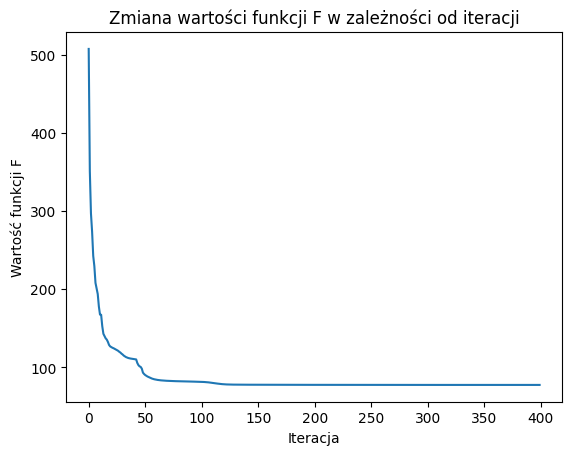

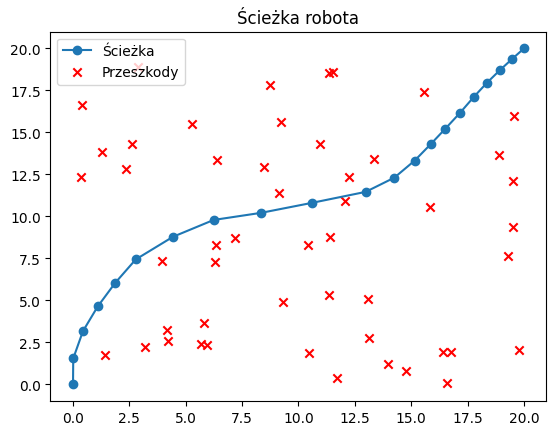

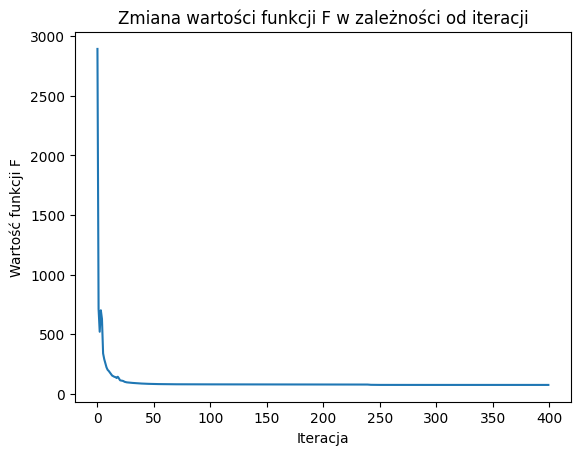

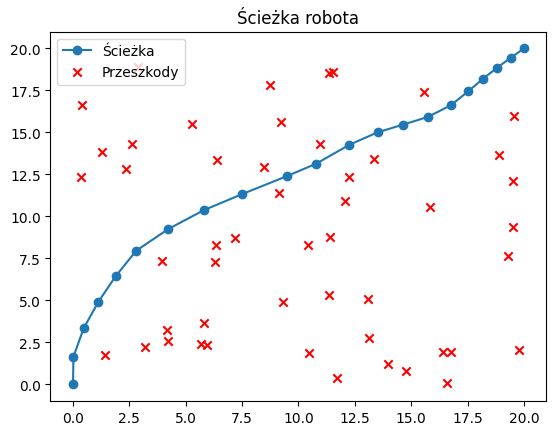

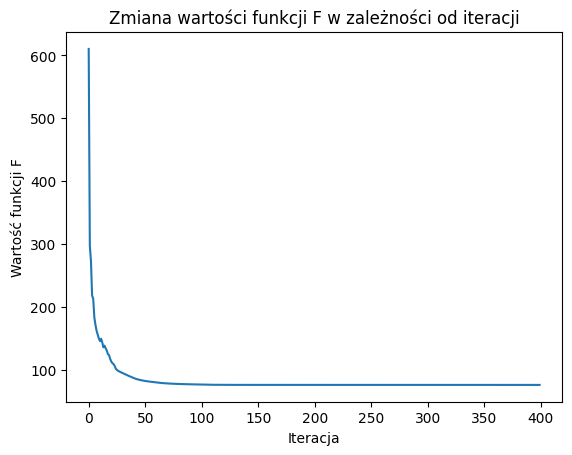

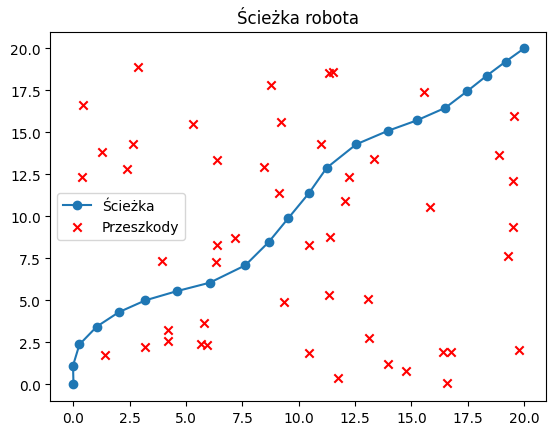

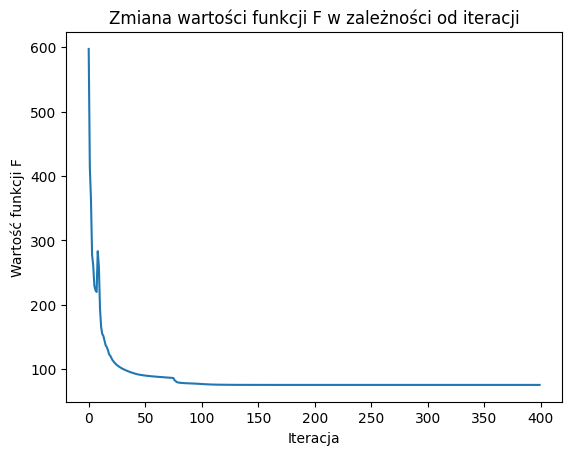

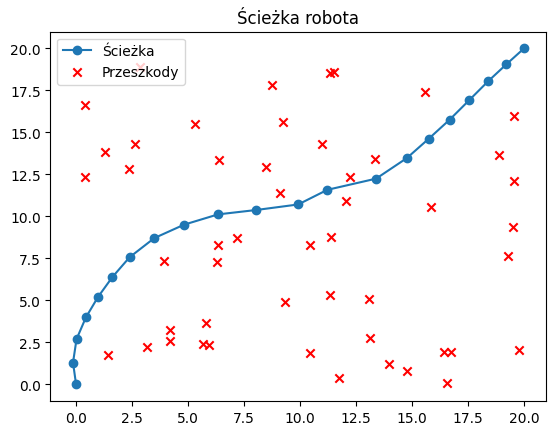

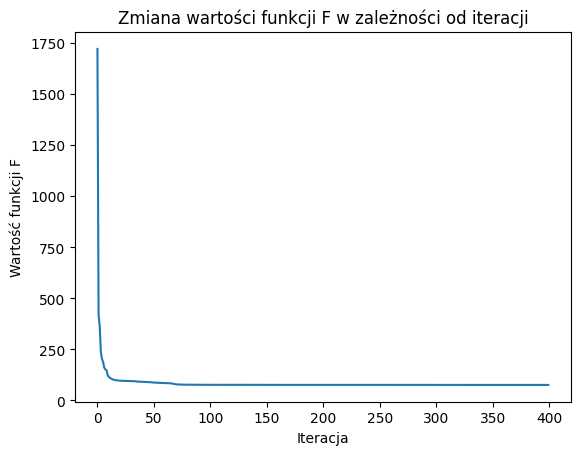

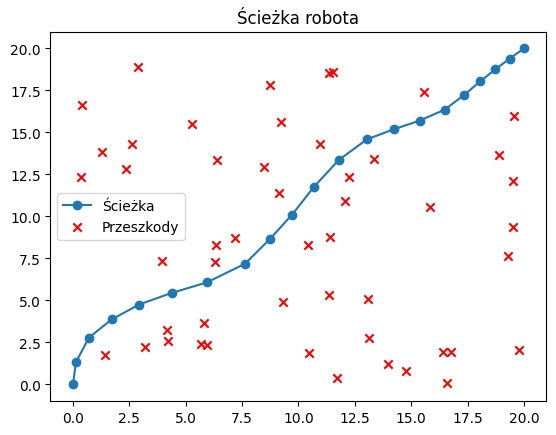

In [8]:
# Inicjalizacja punktów
X = np.zeros((n + 1, 2))
X[0] = x0
X[-1] = xn

def main():
    # Wykonanie algorytmu dla 5 różnych inicjalizacji
    for _ in range(5):
        X[1:-1] = np.random.uniform(0, 20, (n-1, 2))
        X_opt, F_values = gradient_descent(X, R, lambda1, lambda2, eps, 400)
        
        plt.plot(F_values)
        plt.xlabel('Iteracja')
        plt.ylabel('Wartość funkcji F')
        plt.title('Zmiana wartości funkcji F w zależności od iteracji')
        plt.show()

        plt.plot(X_opt[:, 0], X_opt[:, 1], 'o-', label='Ścieżka')
        plt.scatter(R[:, 0], R[:, 1], c='r', marker='x', label='Przeszkody')
        plt.legend()
        plt.title('Ścieżka robota')
        plt.show()

main()